In [1]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
score=pd.read_csv("student_scores.csv")

In [3]:
score.shape

(25, 2)

In [4]:
score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
score.head(10) #To see the first 10 rows

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Text(0.5, 1.0, 'Linearity Check')

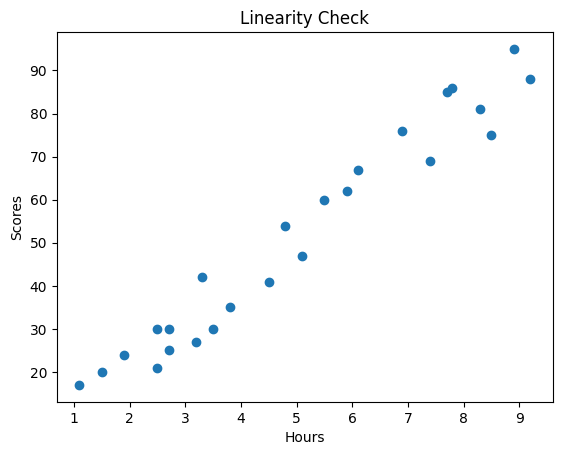

In [6]:
plt.scatter(score['Hours'],score['Scores'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linearity Check')

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <BarContainer object of 10 artists>)

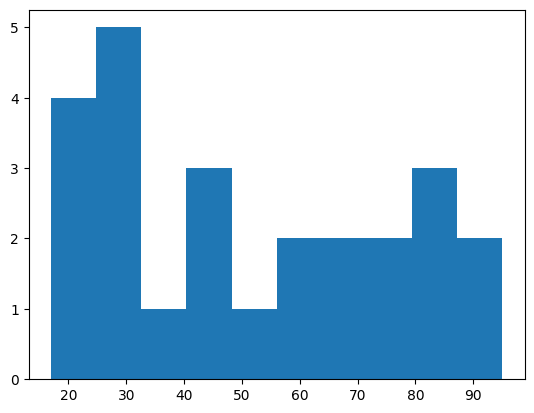

In [7]:
plt.hist(score['Scores'])

In [8]:
#To check the dependency of one variable on other/Checking the collinearity of  variables
score.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [9]:
#Seperating values of X and y
X=score.iloc[:,0:1].values
Y=score.iloc[:,1].values

In [10]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=0) 

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
from sklearn.metrics import r2_score,mean_squared_error
print("Accuracy Score:",r2_score(y_test,y_pred)*100)
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))

Accuracy Score: 94.54906892105355
Mean Squared Error: 21.598769307217406


In [14]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Hours:",hours)
print("Score:",own_pred[0])

Hours: 9.25
Score: 93.69173248737535


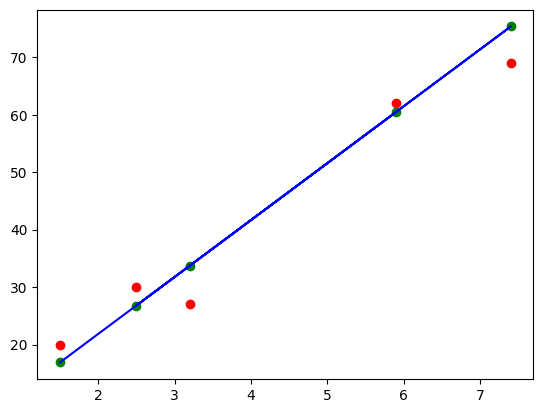

In [15]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='blue')
plt.scatter(X_test,y_pred,color='green')